# 5003 HW6

ZHANG Juntao - 20908272

## Problem Set 6A

### 1. Simulation of the Asset Exchange Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from random import random
from random import sample
from random import seed
from scipy.stats import linregress

#### (a) Get wealth distribution by simulation

In [3]:
ex = -0.7
n = 1000
nsample = 5
iteration = 7000
np.random.seed(7815)
seed(7)

wdis = []
for isample in range(nsample):
    save = np.random.power(ex+1., n)
    wealth = np.ones(n)
    for it in range(iteration):
        pair = sample(range(n), n)
        for k in range(0, n, 2):
            gain = random()*((1.-save[pair[k]])*wealth[pair[k]] + (1-save[pair[k+1]])*wealth[pair[k+1]]) - (1-save[pair[k]])*wealth[pair[k]]
            wealth[pair[k]] += gain
            wealth[pair[k+1]] -= gain
    wdis.append(wealth)
    
wdis = np.array(wdis).ravel()
wdis[:10], len(wdis)

(array([0.14667974, 0.46072047, 0.07837318, 0.32185856, 0.18612989,
        0.02561447, 0.55771363, 0.16438822, 0.03047511, 0.15940269]),
 5000)

#### (b)  Log-log histogram 

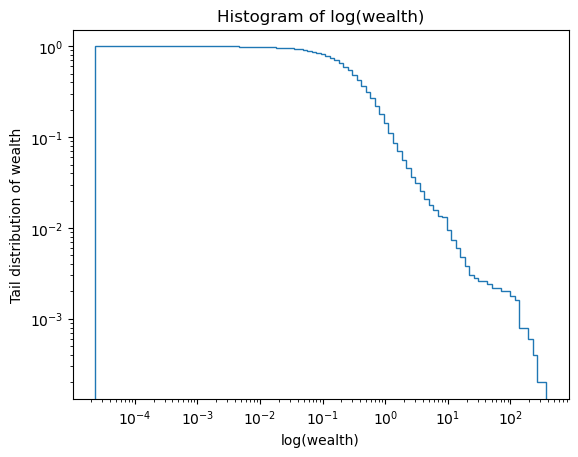

In [4]:
log_bin = [10.**x for x in np.linspace(np.log10(np.min(wdis)), np.log10(np.max(wdis)), 101)]

res_log = plt.hist(wdis, density=1, cumulative=-1, histtype='step', log=True, bins=log_bin)
plt.title('Histogram of log(wealth)')
plt.xlabel('log(wealth)')
plt.ylabel('Tail distribution of wealth')
plt.xscale('log')
plt.show()

Check whether the tail distribution obeys the power law:

From the results below, we can conclude that the tail distribution obeys the power law, and the exponent is 1.05

In [6]:
tail_dis = res_log[0]
bins = res_log[1][:len(res_log[1])-1]
result1 = linregress(np.log(bins[54:]), np.log(tail_dis[54:]))
result1.slope, result1.rvalue**2

(-1.045441312126139, 0.9865336675553473)

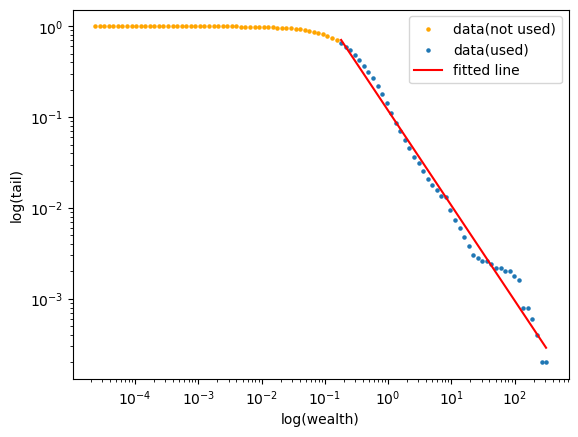

In [7]:
plt.figure()
plt.scatter(bins[:54], tail_dis[:54], s=5, c='orange', label='data(not used)')
plt.scatter(bins[54:], tail_dis[54:], s=5, label='data(used)')
plt.plot(bins[54:], np.exp(result1.intercept + result1.slope*np.log(bins[54:])), 
         'red', label='fitted line')
plt.xlabel('log(wealth)')
plt.ylabel('log(tail)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

#### (c) Calculate $x$

In [9]:
x = 1/2**(result1.slope-1)
x

4.127995254131146

- Conclusion: Among the wealthier agents of the model, when we compare agents’ wealth with those agents whose wealth is doubled, the average number of agents will be reduced by a factor of 4.13



#### (d)  Log-linear histogram 

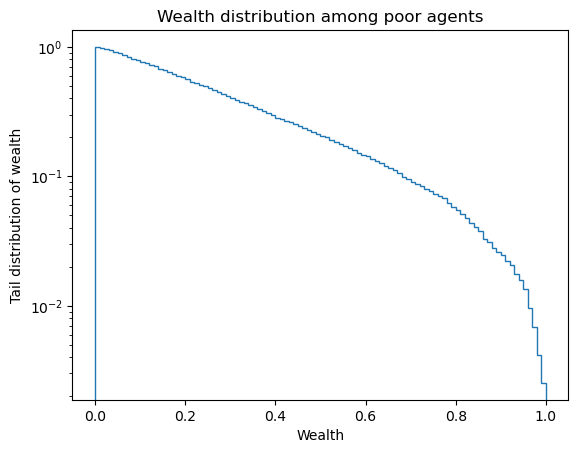

In [10]:
lin_bin = np.linspace(0, 1, 101)
res_lin = plt.hist(wdis, density=1, cumulative=-1, histtype='step', log=True, bins=lin_bin)
plt.title('Wealth distribution among poor agents')
plt.xlabel('Wealth')
plt.ylabel('Tail distribution of wealth')
plt.show()

Check whether the tail distribution obeys the exponential law.

From the results below, we can conclude that the tail distribution obeys the exponential law.

And the exponential function is: 
$log(tail) = 0.12 - 3.52*wealth$ $\rightarrow$ $tail = exp(0.12 - 3.52*wealth)$


In [11]:
tail_dis_2 = res_lin[0]
bins_2 = res_lin[1][:len(res_lin[1])-1]
# res = []
# for i in range(len(bins_2)):
#     res.append([bins_2[i], tail_dis_2[i]])
# df = pd.DataFrame(res, columns=['bins', 'hist'])
# df.to_excel('df.xlsx', index=False)

In [12]:
result2 = linregress(bins_2[:len(bins_2)-20], np.log(tail_dis_2[:len(tail_dis_2)-20]))
result2.slope, result2.intercept ,result2.rvalue**2

(-3.5191151771994233, 0.11816169306383273, 0.9953282459341388)

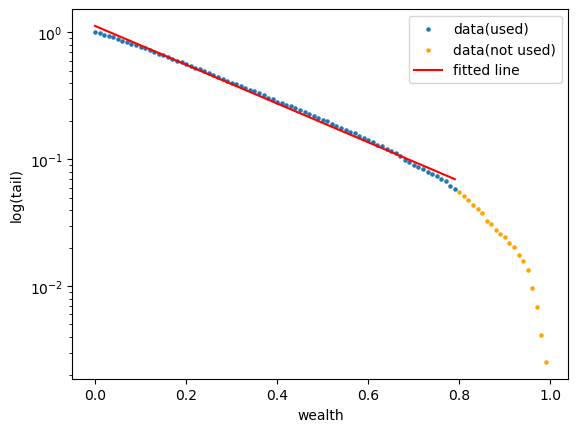

In [13]:
plt.figure()
plt.scatter(bins_2[:len(bins_2)-20], tail_dis_2[:len(bins_2)-20], s=5, label='data(used)')
plt.scatter(bins_2[len(bins_2)-20:], tail_dis_2[len(bins_2)-20:], s=5, c='orange', label='data(not used)')
plt.plot(bins_2[:len(bins_2)-20], np.exp(result2.intercept + result2.slope*bins_2[:len(bins_2)-20]), 
         'red', label='fitted line')
plt.xlabel('wealth')
plt.ylabel('log(tail)')
plt.yscale('log')
plt.legend()
plt.show()

#### (e) Calculate $y$

In [14]:
y = np.log(0.5)/result2.slope
y

0.1969663241063808

- Conclusion: Among the less wealthy agents of the model, when we compare the average number of agents with a certain wealth with those whose wealth is higher by 0.20 (in units of the average wealth of the market), the average number of agents will be reduced by one half.

#### (f) 80-20 Rule

In [15]:
orderd_wdis = np.sort(wdis)[::-1]
np.sum(orderd_wdis[:1000]) / 5000

0.7950740875388995

- Conclusion: as we can see from above result, 79.5% of the wealth was owned by the wealthiest 20% of the population, so our simulation satisfied 80-20 rule.

## Problem Set 6B

### 2. Simulation of the Minority Game

In [14]:
def minority_game(n, iteration):  
    s = 2
    m = 3
    dim = 2 ** m
    darray = np.random.randint(0, 2, size=(n, s, dim))
    vscore = np.zeros((n,s))
    rscore = np.zeros((n, iteration + 1))
    decision = np.zeros(n)

    mu = randint(0, dim - 1)  
    count_0, count_1, w = 0, 0, 0
    buyer = []
    
    for i in range(n):
        jchoice = randint(0, 1)  
        decision[i] = darray[i][jchoice][mu]
        if darray[i][jchoice][mu] == 0:
            count_0 += 1
        elif darray[i][jchoice][mu] == 1:
            count_1 += 1
    excess = (count_1 - count_0) / n
    
    w = 1 if excess > 0 else 0
    buyer.append(count_1)
    
    for i in range(n):
        rscore[i][0] -= excess * (2 * decision[i] - 1)
        for j in range(s):
            vscore[i][j] -= excess * (2 * darray[i][j][mu] - 1)

    for it in range(iteration):
        mu = (2 * mu + w) % dim
        count_0, count_1, w = 0, 0, 0
        for i in range(n):
            jchoice = 0
            maxv = vscore[i][0]
            for j in range(s):
                if vscore[i][j] > maxv:
                    jchoice = j
                    maxv = vscore[i][j]
                elif vscore[i][j] == maxv:
                    if randint(0, 1) == 1:
                        jchoice = j
            decision[i] = darray[i][jchoice][mu]
            if darray[i][jchoice][mu] == 0:
                count_0 += 1
            elif darray[i][jchoice][mu] == 1:
                count_1 += 1
        excess = (count_1 - count_0) / n
        w = 1 if excess > 0 else 0
        buyer.append(count_1)
        for i in range(n):
            rscore[i][it + 1] = rscore[i][it] - excess * (2 * decision[i] - 1)
            for j in range(s):
                vscore[i][j] -= excess * (2 * darray[i][j][mu] - 1)
    return buyer,rscore

In [15]:
np.random.seed(7815)
seed(7)
buyer, rscore = minority_game(101,1000)

#### Plot the number of buyers vs time

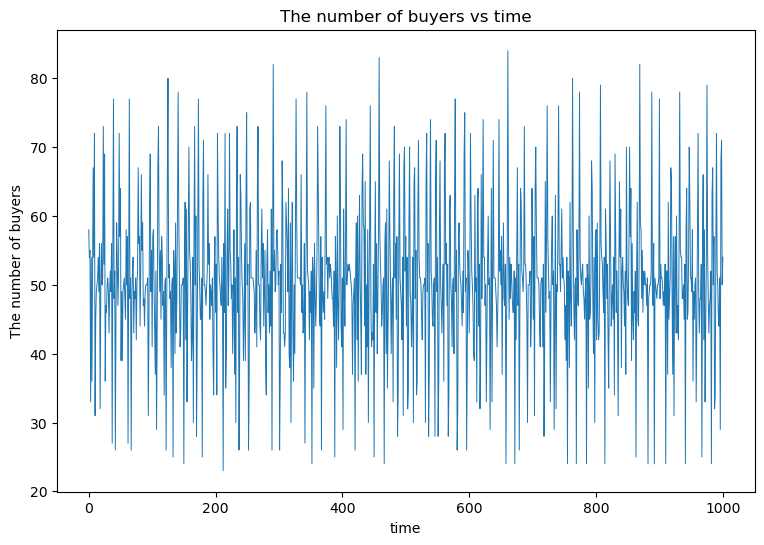

In [16]:
plt.figure(figsize=(9,6))
time = np.linspace(0,1000,1001)
plt.plot(time, buyer,lw=0.7)
plt.title('The number of buyers vs time')
plt.xlabel('time')
plt.ylabel('The number of buyers')
plt.show()

#### Plot the real scores of the 3 best agents and 3 worst agents.

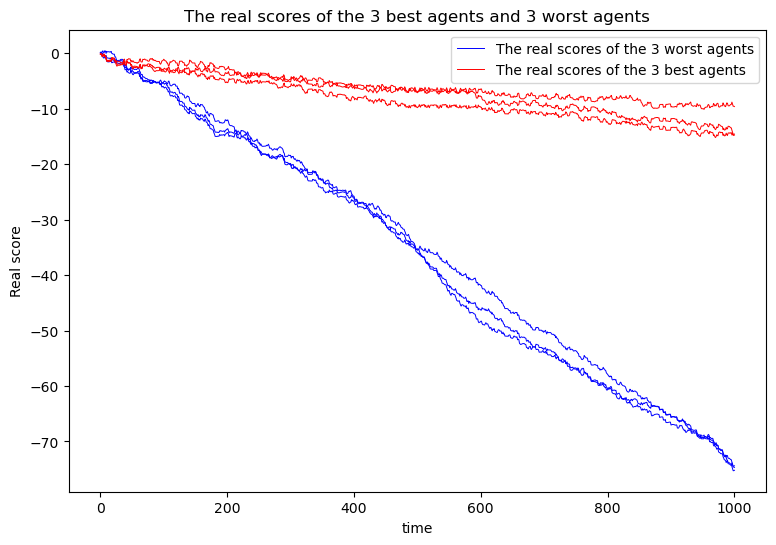

In [17]:
r_score_index=np.argsort(rscore,axis=0)[:,1000]
r_score=rscore[r_score_index,:]

plt.figure(figsize=(9,6))
plt.plot(time,r_score[0],label='The real scores of the 3 worst agents',c='blue', lw=0.7)
plt.plot(time,r_score[1],c='blue', lw=0.7)
plt.plot(time,r_score[2],c='blue', lw=0.7)
plt.plot(time,r_score[-1],label='The real scores of the 3 best agents',c='red', lw=0.7)
plt.plot(time,r_score[-2],c='red', lw=0.7)
plt.plot(time,r_score[-3],c='red', lw=0.7)

plt.legend()
plt.xlabel('time')
plt.ylabel('Real score')
plt.title('The real scores of the 3 best agents and 3 worst agents')
plt.show()

#### Outputs for 10 samples at each value of N for different N

In [18]:
Ns = np.linspace(11,101,10).astype(int)
var_buyers=[]

for N in Ns:
    nbuyer,rscore=minority_game(N,1000)
    var_buyers.append(np.var(nbuyer))
    
print('The average of the variance:',np.average(var_buyers))

The average of the variance: 33.477940041976005


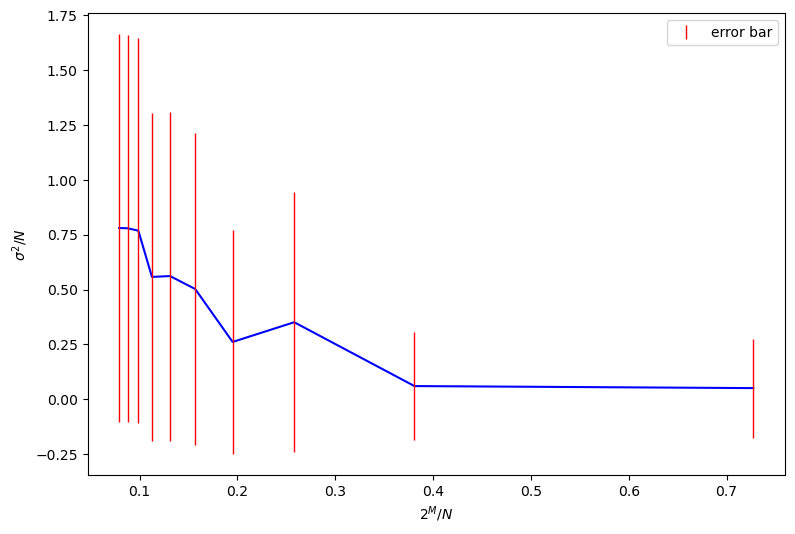

In [20]:
x=[]   
y=[]   
error=[]

for i in range(len(Ns)):
    x.append(2**3/Ns[i])
    y.append(var_buyers[i]/Ns[i])
    error.append(np.sqrt(y[i]))

plt.figure(figsize=(9,6))
plt.plot(x,y,c='blue')
plt.errorbar(x,y,yerr=error,fmt='co',ecolor='r', elinewidth=1,markersize=0.1,label='error bar')
plt.xlabel('$2^M/N$')
plt.ylabel('$\sigma^2 / N$')
plt.legend()
plt.show()